# Importing Dependencies

In [1]:
import pandas as pd               #python package for data analysis
import os                         #python package for interacting with system file
import re                         #python package for dealing with regular expression
import numpy as np                #numpy is dependency of pandas
import neattext as nt             #python package for text cleaning
import spacy                      #premium NLP package for Named Entities Recognition
nlp=spacy.load('en_core_web_sm')  #creating object of spacy model
from collections import Counter
import seaborn as sns

# Reading Data fram Files in each Directory

In [2]:
folder_list=os.listdir()   #getting list of all the directories

In [3]:
folder_list[1:-1]        #filter our desired directories

['2020 - 2021', '2020-2021']

In [4]:
files_dic={}          #dictionary for files management
files_list=[]         #list for to help in files management using dictionary

In [5]:
for folder in folder_list[1:-1]:        #interating through each directory
    files=os.listdir(folder)             #getting list of files present in a specific directory
    for file in files:                   #iterating each file of a specific directory
        f=open(folder+'/'+file,encoding='utf-8')  #reading each file with UTF-8 encoding
        f=f.read()                               #extacting text from each file
        f=re.sub(file[0:-4],'',f)
        files_list.append(f)
    files_dic[folder]=files_list                #creating dictionary of a directory and its files

In [6]:
files_dic

{'2020 - 2021': [' Data Analytics for the Internet of Things (3).\nConcepts/applications of Data Analytics for loT. Data science, machine learning, and artificial intelligence at the edge. Inference, sensor fusion, bandwidth, transfer learning, and generative models.',
  ' Fundamentals of Data Science (3).\nThis course will teach data science fundamentals to undergraduate non-CS majors. The focus will be on real- world applications and use of associated analysis, Visualization tools, Python programming.\nPrerequisite: None for B.S. or B.A. standing or permission of the instructor.',
  ' Human-Computer Interaction (3).\nHCI foundations, user-centered interaction design, prototyping and programming interactive systems, qualitative and quantitative evaluation techniques, designing multimodal interfaces.',
  ' Introduction to Robot Vision (3).\nPerspective and orthographic projections; the processing of edges, regions, motion, shading, texture, object detection, recognition, and machine le

# Average % of Different Part of Speech

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict

def average_parts_of_speech(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    pos_counts = defaultdict(int)
    total_tokens = 0
    for token in doc:
        pos_counts[token.pos_] += 1
        total_tokens += 1
    return {pos: count / total_tokens for pos, count in pos_counts.items()}

def plot_average_parts_of_speech(directory_name,text):
    average_pos=average_parts_of_speech(text)
    pos = list(average_pos.keys())
    percentages = [100 * average_pos[p] for p in pos]
    plt.figure(figsize=(25,10))
    plt.bar(pos, percentages,color="purple")
    plt.xlabel("Part of Speech")
    plt.ylabel("Average Percentage")
    plt.title("POS Tag Frequency for " + directory_name)
    plt.show()


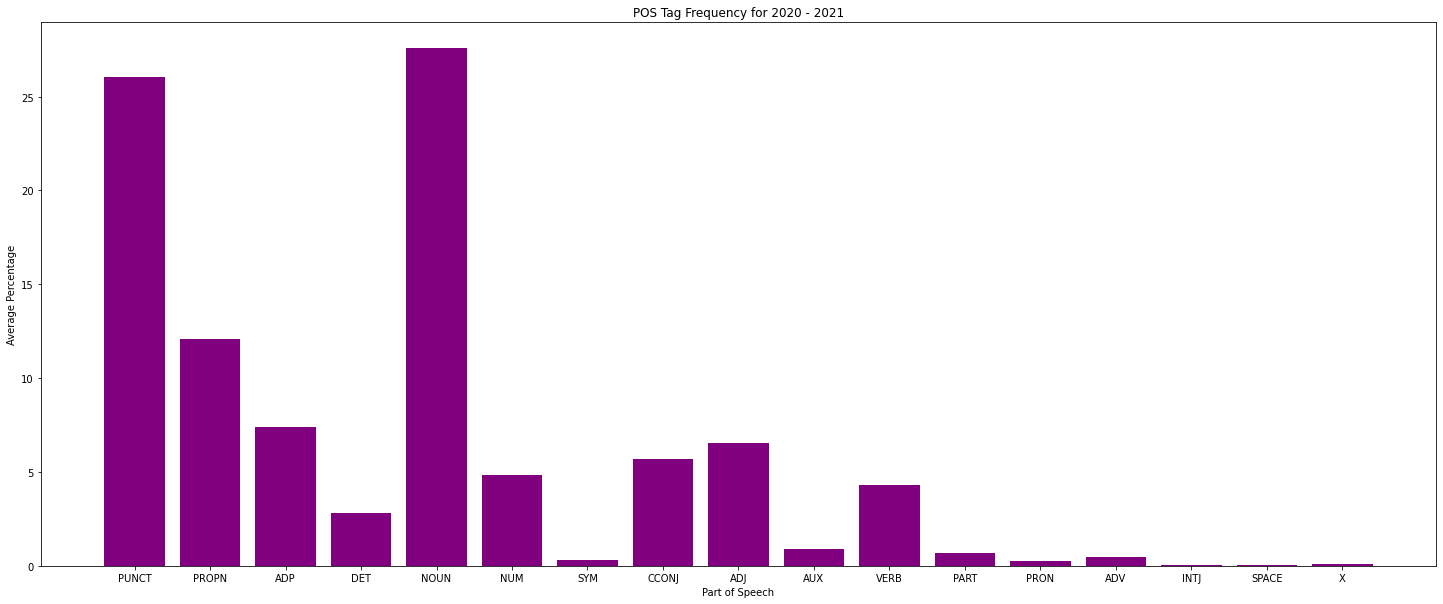

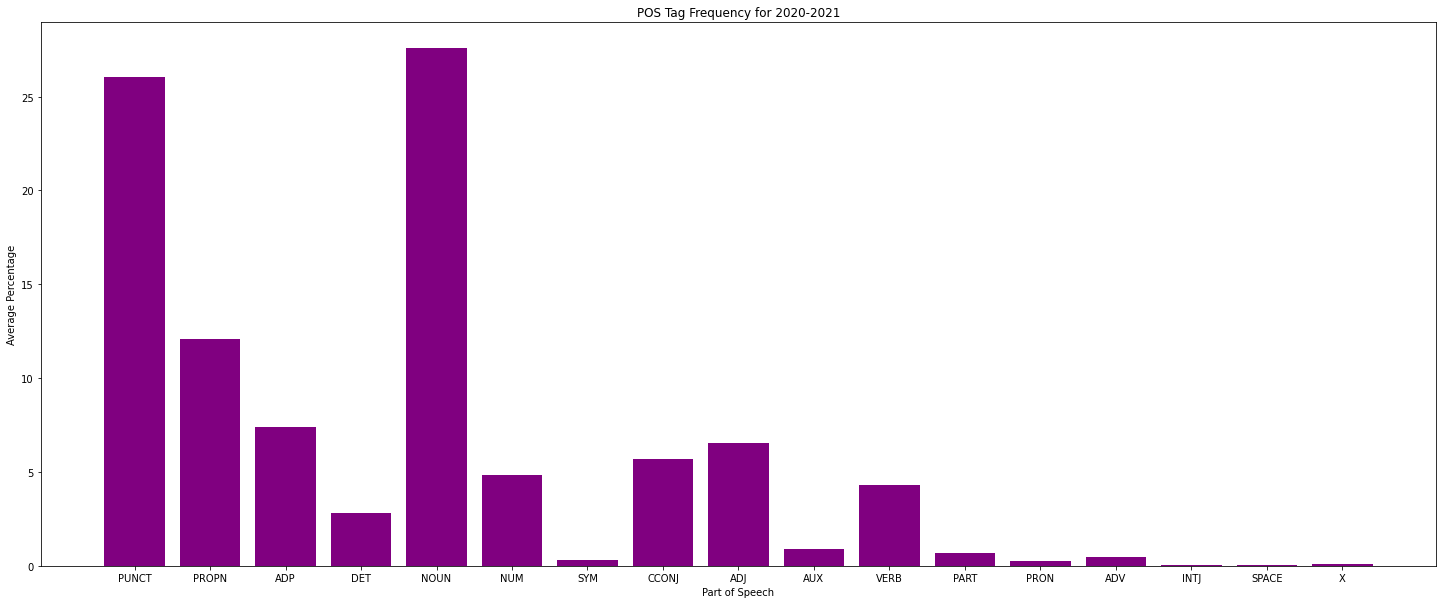

In [8]:
for key,value in files_dic.items():
    plot_average_parts_of_speech(key,str(value))

# Common Words

In [9]:
pos_list=[]
pos_dic={}

In [10]:
def pos_extraction(dirname,text):
    text=nt.remove_special_characters(text)
    pos_list=[]
    doc=nlp(text)
    for word in doc:
        if word.pos_ in ["NOUN","PROPN","ADJ","VERB"]:
            pos_list.append(word.text)
    pos_dic[dirname]=pos_list

In [11]:
for key,value in files_dic.items():
    pos_extraction(key,str(value))

In [12]:
set1 = set(pos_dic['2020 - 2021'])
set2 = set(pos_dic['2020-2021'])

common = set1.intersection(set2)
print("Common words:", common)
print("Count:", len(common))

Common words: {'electro', 'cloud', 'languages', 'Cybersecurity', 'overview', 'bias', 'undergraduates', 'biology', 'proof', 'auctions', 'second', 'Communication', 'Cooperative', 'Telecommunications', 'objects', 'IO', 'survey', 'running', 'tools', 'probabilistic', 'provides', 'policing', 'EEE', 'Language', 'big', 'sources', 'conceptual', 'systemsnPrerequisite', 'rendering', 'automated', 'advance', 'communicationnPrerequisite', 'monitoring', 'services', 'site', 'future', 'extracorporeal', 'origin', 'DBMS', 'Absorption', 'controls', 'orthographic', 'CDA4101', 'Classes', 'queuing', 'requirements', 'attacksnPrerequisites', 'Rotations', 'parallel', 'multiplexing', 'sets', 'Commercialization', 'electrical', 'therapy', 'advisor', 'NPcompleteness', 'spanning', 'Foundation', 'World', 'are', 'configuration', 'ASP', 'usercentered', 'Algebra', '3110L', 'metrics', 'centers', 'available', 'recovery', 'Transaction', 'circuit', 'Management', 'knowledge', 'Printing', 'nFundamentals', 'majorsnPrerequisite

In [13]:
common_dic=Counter(common).most_common(10)

In [23]:
common_dic=dict(common_dic)

<BarContainer object of 10 artists>

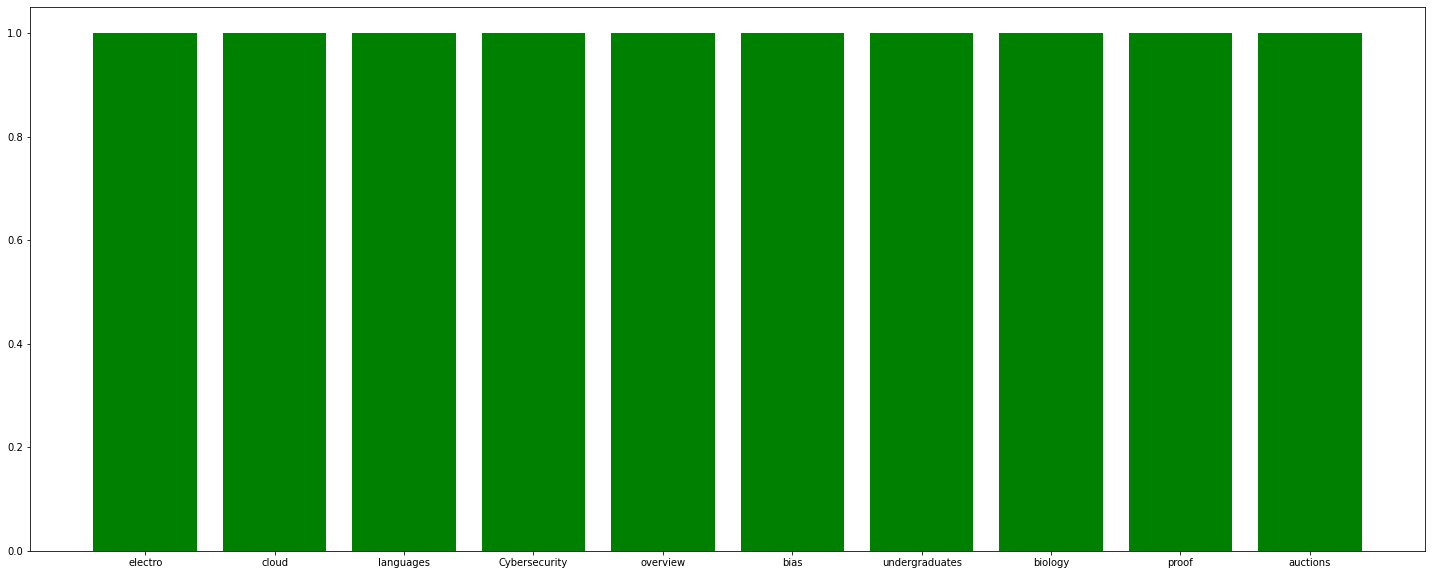

In [24]:
plt.figure(figsize=(25,10))
plt.bar(common_dic.keys(), common_dic.values(),color="green")

# Unique Words

In [16]:
all_words = pos_dic['2020 - 2021'] + pos_dic['2020-2021']
unique_words = set(all_words)

print("Unique words:", unique_words)
print("Count:", len(unique_words))

Unique words: {'electro', 'cloud', 'languages', 'Cybersecurity', 'overview', 'bias', 'undergraduates', 'biology', 'proof', 'auctions', 'second', 'Communication', 'Cooperative', 'objects', 'Telecommunications', 'IO', 'survey', 'running', 'tools', 'probabilistic', 'provides', 'policing', 'EEE', 'Language', 'big', 'sources', 'conceptual', 'systemsnPrerequisite', 'rendering', 'automated', 'advance', 'communicationnPrerequisite', 'monitoring', 'services', 'site', 'future', 'extracorporeal', 'origin', 'DBMS', 'Absorption', 'controls', 'orthographic', 'CDA4101', 'Classes', 'queuing', 'requirements', 'attacksnPrerequisites', 'Rotations', 'parallel', 'multiplexing', 'sets', 'Commercialization', 'electrical', 'therapy', 'advisor', 'NPcompleteness', 'spanning', 'Foundation', 'World', 'are', 'configuration', 'ASP', 'usercentered', 'Algebra', '3110L', 'metrics', 'centers', 'available', 'recovery', 'Transaction', 'circuit', 'Management', 'knowledge', 'Printing', 'nFundamentals', 'majorsnPrerequisite

In [17]:
uniue_dic=Counter(unique_words).most_common(10)

In [21]:
uniue_dic=dict(uniue_dic)
uniue_dic

{'electro': 1,
 'cloud': 1,
 'languages': 1,
 'Cybersecurity': 1,
 'overview': 1,
 'bias': 1,
 'undergraduates': 1,
 'biology': 1,
 'proof': 1,
 'auctions': 1}

<BarContainer object of 10 artists>

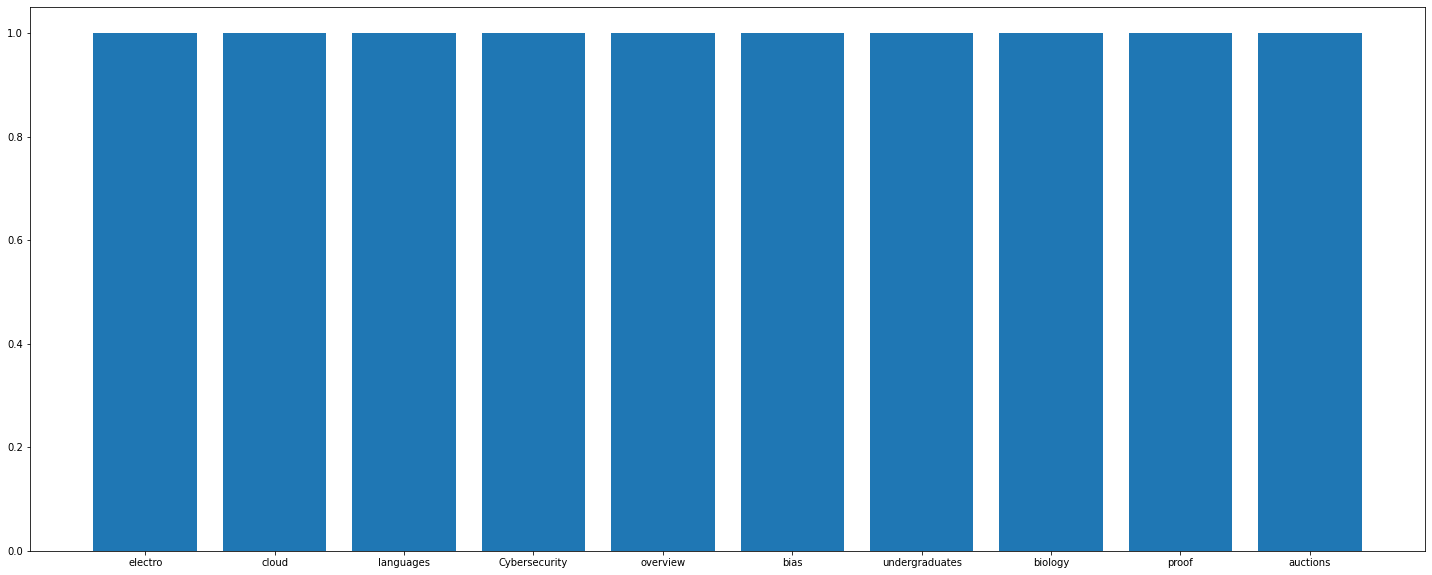

In [22]:
plt.figure(figsize=(25,10))
plt.bar(uniue_dic.keys(), uniue_dic.values())

In [21]:
pos_avg_dic={}
nouns=0
versbs=0
propn=0
adj=0
count=0

# Average POS for each Directory

In [23]:
def pos_avg(directory_name,text):
    #text=nt.remove_special_characters(text)
    nouns=0
    versbs=0
    propn=0
    adj=0
    count=0
    doc=nlp(text)
    print(len)
    for word in doc:
        count=count+1
        if word.pos_=="NOUN":
            nouns=nouns+1
        elif word.pos_=="PROPN":
            propn=propn+1
        elif word.pos_=="ADJ":
            adj=adj+1
        elif word.pos_=="VERB":
            versbs=versbs+1
    pos =["NOUN","PROPN","ADJ","VERB"]
    plt.figure(figsize=(25,10))
    plt.bar(["NOUN","PROPN","ADJ","VERB"],[nouns/count,propn/count,adj/count,versbs/count],color="red")
    plt.xlabel("Part of Speech")
    plt.ylabel("Average Percentage")
    plt.title("POS Tag Frequency for " + directory_name)
    plt.show()

<built-in function len>


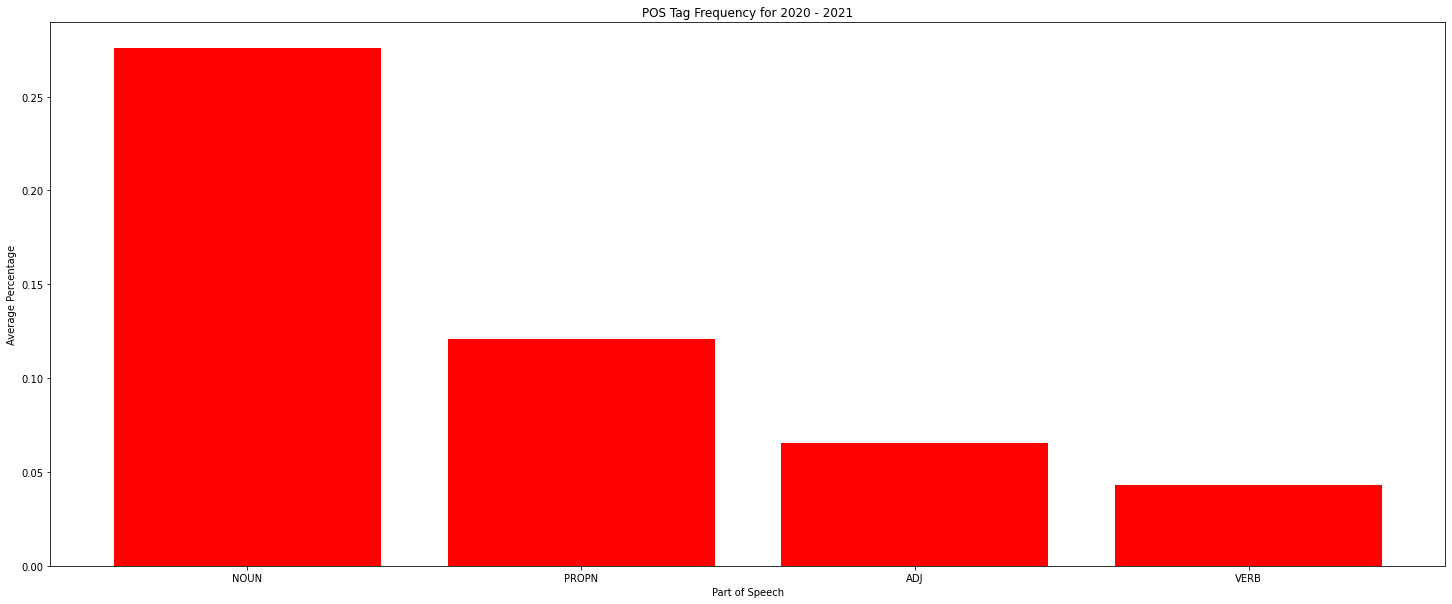

<built-in function len>


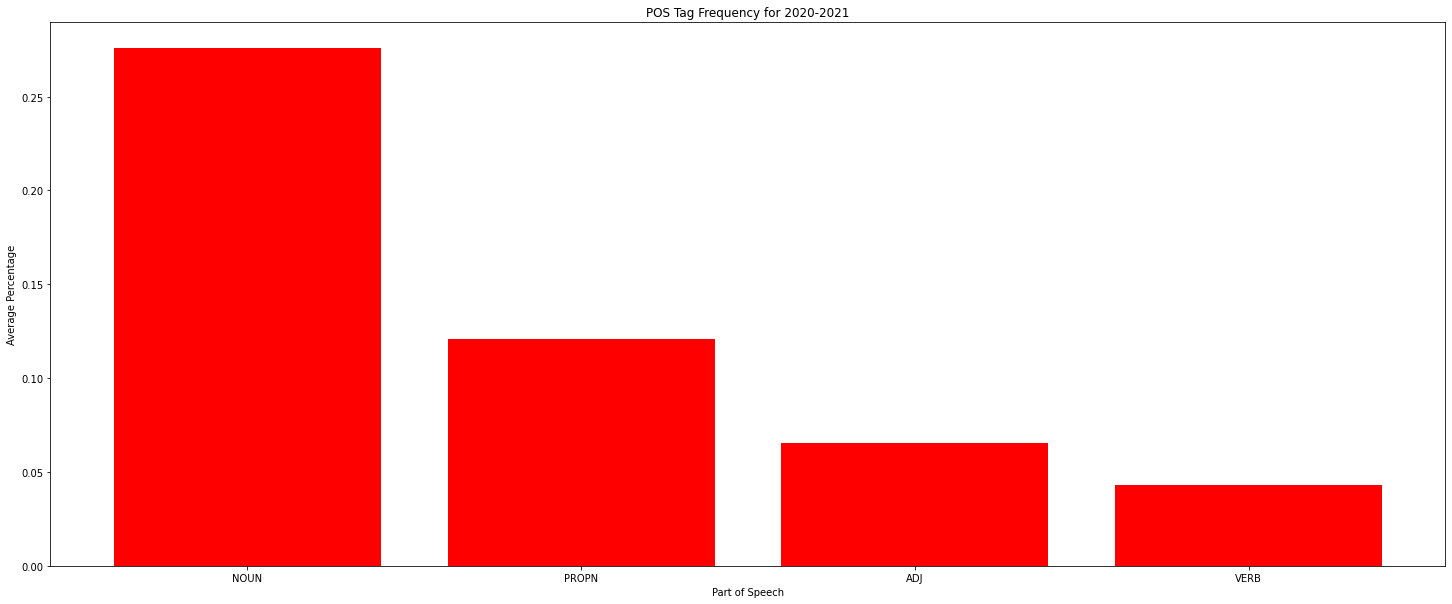

In [24]:
for key,value in files_dic.items():
    pos_avg(key,str(value))